# IV. Grouping Motor Vehicle Collision Data

Here we group motor vehicle collision records into recordsets, with each recordset corresponding with a particular location (usually an intersection).

In [10]:
import pandas as pd
mvc = pd.read_csv("../data/mvc/mvc.csv", index_col=0)

~214 MB in-memory.

In [2]:
sum(mvc.memory_usage().values) / 1000000

214.30256

A quick examination confirms that many records lacks complete data. In particular, we are concerned about the data nullity of entries with recorded latitute and longitude.

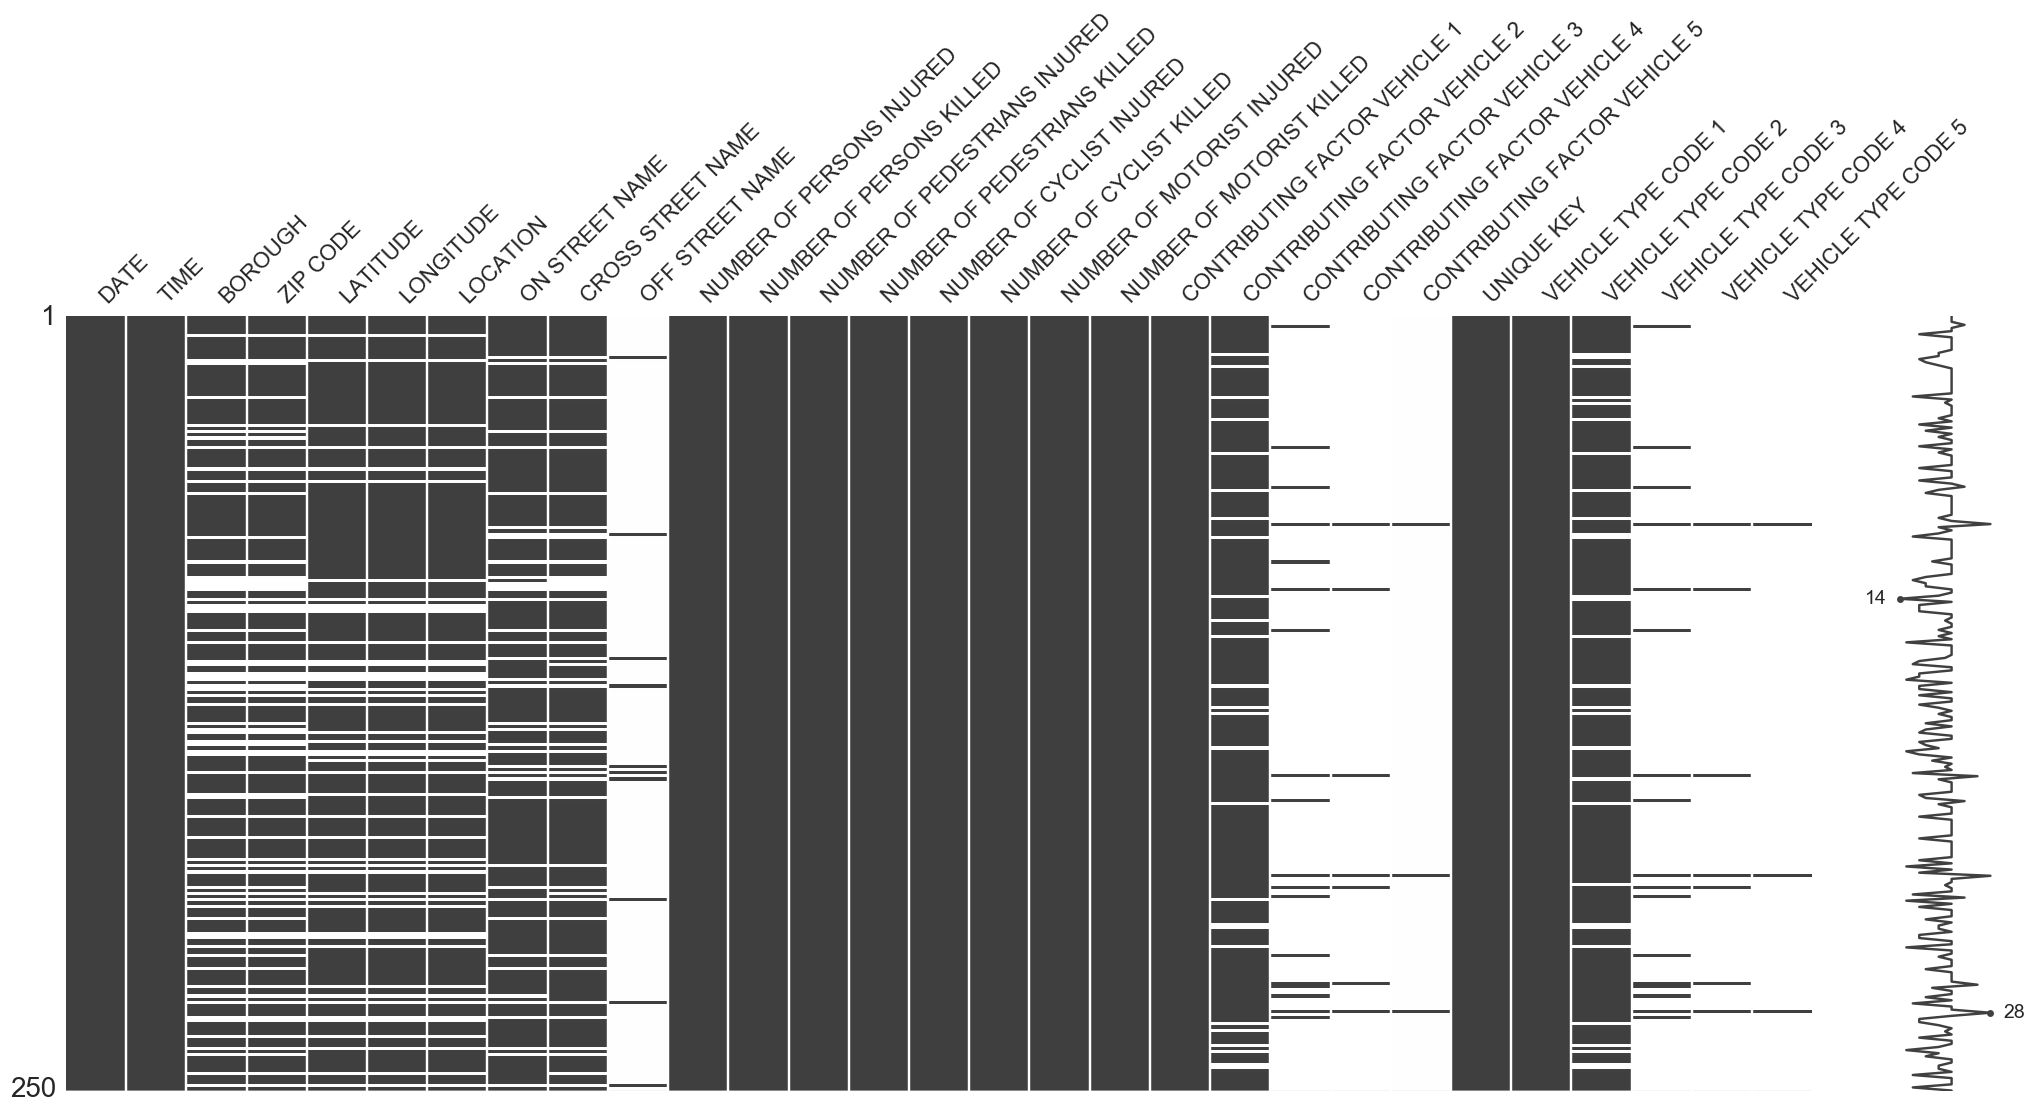

In [11]:
import missingno as msno
%matplotlib inline
msno.matrix(mvc.sample(250))

We'll remove those entries.

In [12]:
mvc_f = mvc[(mvc['LATITUDE'].notnull()) & (mvc['LONGITUDE'].notnull())]

In [6]:
len(mvc)

892927

In [5]:
len(mvc_f)

738997

Then, we want counts by latitude and longitude. So let's aggregate, using the combined `LOCATION` column.

In [13]:
mvc_f['LOCATION'].value_counts().head()

(40.6960346, -73.9845292)    643
(40.7606005, -73.9643142)    529
(40.7572323, -73.9897922)    483
(40.6757357, -73.8968533)    466
(40.6585778, -73.8906229)    458
Name: LOCATION, dtype: int64

In [17]:
mvc_fg = mvc_f.groupby('LOCATION').count()
mvc_fg = mvc_fg['UNIQUE KEY'].rename(colums={'UNIQUE KEY': 'COUNT'})

In [18]:
mvc_fg.head()

LOCATION
(40.4989488, -74.2443651)    2
(40.4991346, -74.2434848)    1
(40.4994787, -74.2417278)    1
(40.499659, -74.2408224)     1
(40.499842, -74.2399169)     2
dtype: int64

In [20]:
mvc_fg.sort_values(ascending=False).head()

LOCATION
(40.6960346, -73.9845292)    643
(40.7606005, -73.9643142)    529
(40.7572323, -73.9897922)    483
(40.6757357, -73.8968533)    466
(40.6585778, -73.8906229)    458
dtype: int64

This is the form of the data that we need. We can save this locally now and exit.

In [21]:
mvc_fg.to_csv("../data/mvc/mvc_coordinate_counts.csv")